# xsin(5x)  @DeepXDE

In [1]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def func(x):
    return x*np.sin(5*x)

In [3]:
geom=dde.geometry.Interval(-1,1)
num_train=16
num_test=100
data=dde.data.Function(geom,func,num_train,num_test)

In [4]:
activation='tanh'
initializer='Glorot uniform'
net=dde.nn.FNN([1]+[20]*3+[1],activation,initializer)

In [8]:
model=dde.Model(data,net)
model.compile('adam',lr=0.001,metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 0.128208 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.60e-01]    [4.03e-01]    [1.39e+00]    
1000      [6.90e-04]    [5.58e-04]    [5.17e-02]    
2000      [2.49e-04]    [2.38e-04]    [3.38e-02]    
3000      [7.36e-05]    [9.82e-05]    [2.17e-02]    
4000      [4.42e-05]    [7.71e-05]    [1.92e-02]    
5000      [3.30e-05]    [6.37e-05]    [1.75e-02]    
6000      [3.09e-05]    [5.67e-05]    [1.65e-02]    
7000      [2.37e-05]    [4.97e-05]    [1.54e-02]    
8000      [1.69e-05]    [4.58e-05]    [1.48e-02]    
9000      [1.59e-05]    [4.68e-05]    [1.50e-02]    
10000     [1.05e-05]    [3.99e-05]    [1.38e-02]    

Best model at step 10000:
  train loss: 1.05e-05
  test loss: 3.99e-05
  test metric: [1.38e-02]

'train' took 4.175923 s



Saving loss history to c:\Users\pc\Desktop\PINN\tutorial code\loss.dat ...
Saving training data to c:\Users\pc\Desktop\PINN\tutorial code\train.dat ...
Saving test data to c:\Users\pc\Desktop\PINN\tutorial code\test.dat ...


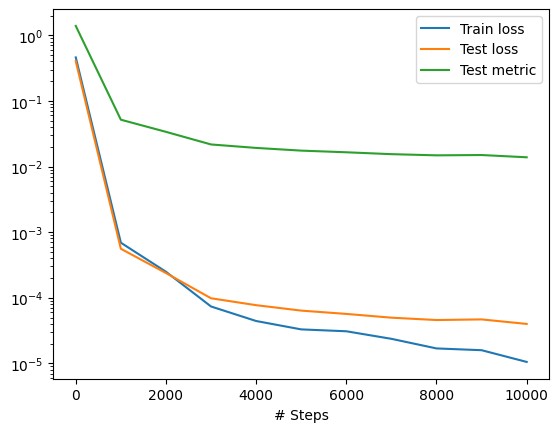

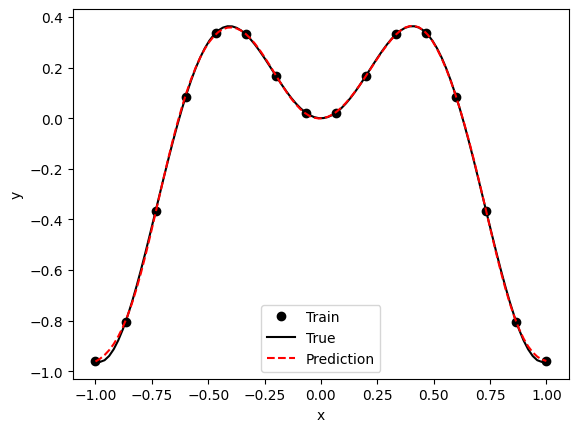

In [9]:
dde.saveplot(losshistory,train_state,issave=True,isplot=True)